# Convolutional Neural Network (CNN)

## Intro

La innovación de las redes convolucionales (CNN) es la habilidad de preservar la estructura espacial y fueron desarrolladas inicialmente para tareas de reconocimiento de objetos. Por ejemplo, escritos, caras, imágenes, dígitos, etc. Son populares porque han tenido muy buenos resultado en identificar objetos y en proceso de lenguaje natural. 

Por ejemplo, las redes Feed-Forward, las imágenes de 28x28 las pasábamos a 784 inputs (+bias). El tema con hacer este flattening de las imágenes a un vector de pixles es que se pierde la estrcutura espacial. CNN preservan esta relación espacial y aprenden características de los inputs a partir de pequeños cuadros en las imágenes (input data). Estas características se aprenden a lo largo de todas la imágen y le permite a la red identificar objetivos con diferentes enfoques (e.g. ojos de una cara pueden estar en cualquier lado de la imágen: invariante a la posición). 

Las CNN usualmente trabajan con imágenes en 2 dimensiones, aunque pueden trabajr con 1 y 3 dimensiones. 

Beneficios: 
- Menos parámetros (pesos) que uan red Feed-Forward
- Invariante a posiciones de objetios y distorsiones
- Aprende y Generaliza características de forma eficiente. 

Hay 3 tipo de capas en las CNN: 
1. Convolutional Layer (más importante y por la cual tiene su nombre)
2. Pooling Layer
3. Capas Totalmente Conectadas (estilo Feed-Forward)


# Convolutional Layer

Una convolución es la aplicación de filtro a un input y tiene como resultado una activación. Repetidas aplicaciones del mismo filtro al input resultan en un mapa de activaciones llemado *feature map*, indicando la ubicación y fortalezas de un *feature*/características en un input (como una imagen). La convolución es una operación lineal (e.g. producto punto) entre un conjunto de pesos (2-dimensiones) y el input (datos 2-d). Esta operación se llama Filtro o Kernel. 

Las CNN aprenden un número grande de filtros en paralelo de un training dataset en el conexto de un problema predictivo. Las características se pueden encontrar en cualquier parte de la imagen (e.g. ojos). 


El Filtro es más pequeño que el input. Al aplicar el producto punto entre un filtro y el input arroja un escalar/real/número. Esto se repite varias veces en diferentes lugares del input (mismo producto del filtro en otros lados de la imagen)(puede overlapping)
Este valor escalar se acomado en un arreglo 2-d llamado *feature map*. Luego se pasa cada valor del *feature map* a una función no lineal, como Relu. 

Poderoso: El hacerlo iterativamente le permite encontrar el patrón en cualquier lugar de la imagen: Invariance

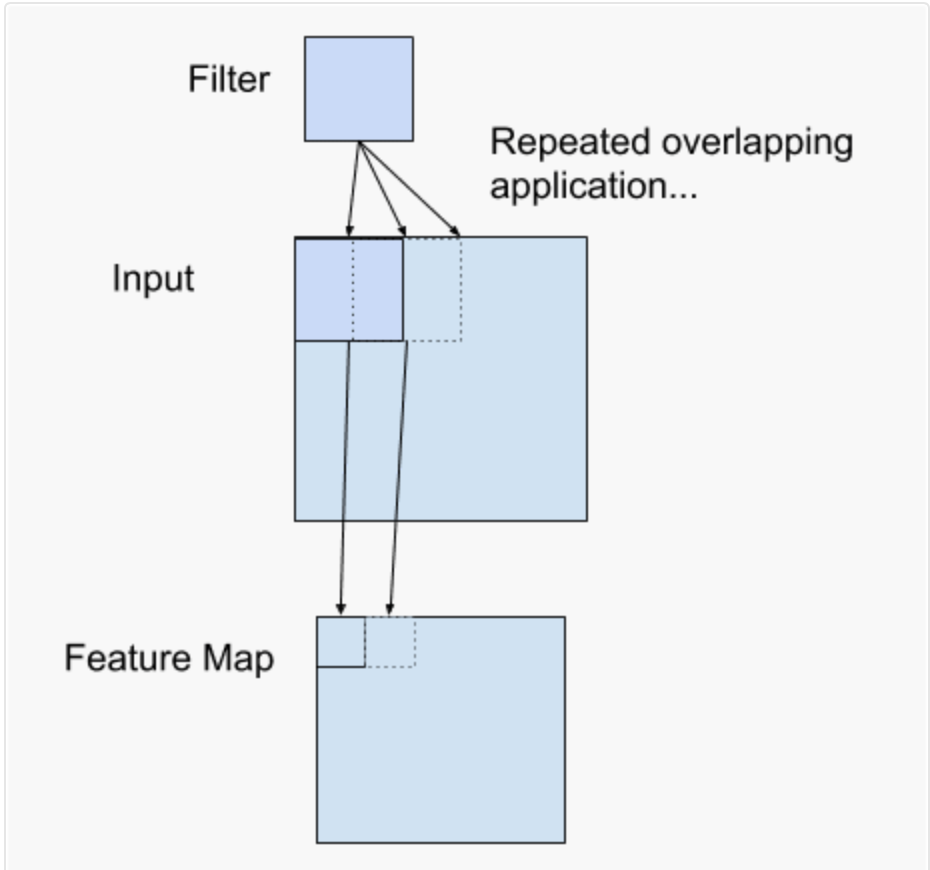

Una CNN  usualmente tiene entre 30 y 500 filtros en paralelo para un input dato. Esta da 500 formas, por ejemplo, diferentes de extraer características de un input, o muchas formas *aprender a ver* el training dataset y de *ver* el test dataset. 

Multicanal: Los colores pueden ser vistos como un tercer canal, estilo de profundidad. Por un lado coordenas x(filas),y(columans), z(profundidad). Al final tanto el Filtro y el Input hacen un producto escalar en 3-dimensiones (O sea, también hay pesos para la profundidad). Cada filtro arroja un sólo Feature Map. 

Las capas capas convolucionales se puede aplicar no sólo a la cada de input si no también si quisieran a la de output.
¿Qué pasa al juntar capas convolucionales? Juntar capas convolucionales permite una descomposición del input, apreden a encontrar otro tipo de características. Los primeros filtros aprenden a ver lineas y los otros pueden encontrar sombreas. Y continuando pues pueden encontrar caras, casas, etc. 

## Ejemplo una dimensión

In [1]:
import tensorflow

In [ ]:
#vamos a calcular convoluciones en 1 dimensión

In [2]:
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D

In [3]:
#defini un input data
data=asarray([0,0,0,1,1,0,0,0])
data=data.reshape(1,8,1)

In [4]:
data

array([[[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]])

In [5]:
data.shape

(1, 8, 1)

In [6]:
#dimensión 1: número de muestras
#dimensión 2: número de objetos
#dimensión 3: si hay más de un color

In [8]:
#Crear un modlo
model=Sequential()
#vamos a usar un filtro de 3x1 (shape del filtro)
model.add(Conv1D(1,3,input_shape=(8,1)))

In [9]:
#Definimos un filtro, que en este caso va a ser un detctor lineal (si es una 
#dimnsión). Se puede ver como un detector de sobresaltos en el centro




In [10]:
asarray([[[0]],[[1]],[[0]]])

array([[[0]],

       [[1]],

       [[0]]])

In [11]:
asarray([[[0]],[[1]],[[0]]]).shape

(3, 1, 1)

In [12]:
weights=[asarray([[[0]],[[1]],[[0]]]),asarray([0.0])]

In [13]:
weights

[array([[[0]],
 
        [[1]],
 
        [[0]]]),
 array([0.])]

In [14]:
#almacernar el filtro en el modelo
model.set_weights(weights)

In [15]:
#vamos a verlos
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


In [17]:
#Aplicar el filtro a nuestro input data
yhat=model.predict(data)
yhat

array([[[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]]], dtype=float32)

In [18]:
data

array([[[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]])

In [19]:
weights

[array([[[0]],
 
        [[1]],
 
        [[0]]]),
 array([0.])]

In [ ]:
#filtro x input_data
[0,1,0].[0,0,0]=0
[0,1,0].[0,0,1]=0
[0,1,0].[0,1,1]=1
[0,1,0].[1,1,0]=1
[0,1,0].[1,0,0]=0
[0,1,0].[0,0,0]=0

#El resultado fue yhat
array([[[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]]],


In [20]:
yhat

array([[[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]]], dtype=float32)

## Ejemplo 2 dimensiones
Vamos a expandir el detector de centros en 1d a detectro de una linea vertical en una imagen de 2d


El input va a ser una imagen de 8x8, con un solo canal (gris) con una linea vertical en medio

El input en Conv2D capa debe ser 4 dimensiones 

- La primera dimensión define el número de muestras, en este caso sólo hay una muestra
- La segunda dimensión define el número de filas, en este caso hay 8
- La tercer ... de columnas, en este caso 8
- La cuarta y última define el número de canales, en este caso es uno (gris)

[muestras, filas, columnas, canales] =[1,8,8,1]

- El fitro será un cuadrado de 2d con forma 3x3. El layer/capa va esperar inputs [columnas, rows, canales]
- Vamos a definir un detector de lineas verticales en nuestro input data

Finalmente vamos a aplicar el fitro a la imagen de input, que resultara en feature map que esperaríamos 
que muestre la detección de la línea vertical en la imagen input. 

El shape de nuestro feature map será de 4 dimensiones [batch,rows,columns, filters]. Haremos un sólo batch y tenemos un sólo filtro (un filtro y un input channel), el output shape debería ser algo [1,?,?,1]



In [21]:
from tensorflow.keras.layers import Conv2D

In [22]:
#el input data es una imagen de 8x8

In [23]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

In [14]:
import matplotlib.pyplot as plt

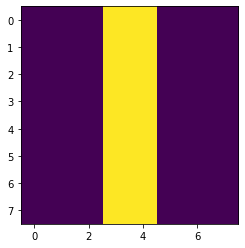

In [25]:
plt.imshow(data)

In [26]:
data=asarray(data)

In [27]:
data=data.reshape(1,8,8,1)

In [28]:
data

array([[[[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]]]])

In [29]:
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(8,8,1))) #proponiendo un filtro de 3x3





In [30]:
data

array([[[[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]]]])

In [31]:
#Filro de detector de líneas

detector=[[[[0]],[[1]],[[0]]],
        [[[0]],[[1]],[[0]]],
        [[[0]],[[1]],[[0]]]]

In [32]:
weights=[asarray(detector),asarray([0.0])]

In [33]:
weights

[array([[[[0]],
 
         [[1]],
 
         [[0]]],
 
 
        [[[0]],
 
         [[1]],
 
         [[0]]],
 
 
        [[[0]],
 
         [[1]],
 
         [[0]]]]),
 array([0.])]

In [34]:
#Guardar el filtro en la Red
model.set_weights(weights)

In [35]:
#Vamos a ver cómo se ve
model.get_weights()

[array([[[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
#Aplicar el filtro al input data
yhat=model.predict(data)

In [37]:
yhat

array([[[[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]]]], dtype=float32)

In [39]:
yhat.shape

(1, 6, 6, 1)

In [40]:
#vamos a impimir ordenado
for x in range(yhat.shape[1]):
    #impirmir cada columna c en una fila
    print([yhat[0,x,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [41]:
#Feature Map
#Se pued ver por la Escala de los números (0 a 3 ) que los filtros 
#han dtcatdo una linea vertican con importante activación (3) en mdio del feature map

#vamos a darle un zoom a esto. Primero el filtro se aplicó a la esquina superior
#izquiera de la imagn. Es decir, a una de las 3x3 elementos. La imagen input que
#multiplicará al filtro debe ser igual a la dimensión del filtro

#En numpy no podemos usar la función dot(), en lugar tenmos que usar tensordot() 
#de numpy par que sume a lo largo de la dimensión 


In [ ]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

In [42]:
from numpy import tensordot

In [43]:
#filtro 
m1=asarray([[0,1,0],
           [0,1,0],
           [0,1,0]])

In [44]:
m1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [45]:
#la primera parte del inut data que multipicará a nuestro filtro será
m2=asarray([[0,0,0],
           [0,0,0],
           [0,0,0]])

In [46]:
tensordot(m1,m2)

array(0)

In [ ]:
#eseta operació la va ir recorriendo para un conjunto de filas y columnas
0,1,0      0,0,0
0,1,0   .  0,0,0   = 0
0,1,0      0,0,0

In [ ]:
0,1,0      0,0,1
0,1,0   .  0,0,1   = 0
0,1,0      0,0,1

In [ ]:
0,1,0      0,1,1
0,1,0   .  0,1,1   = 3
0,1,0      0,1,1

In [ ]:
#Este proceso se repite para la primera fila hasta que termine la última columna
[0 0 3 3 0 0]

In [ ]:
#Una vez que termine lo anterior para la primer fila, 
#se repetirá el proceso para todas las filtas. 
#El feature map será de 6x6
#pasamos de input data de 8x8 a un feature map de 6x6.



In [47]:
#Zero Padding (Rellenar con Ceros): con el objetivo de que el Feature Map 
#preserve el mismo tamaño que el input data. 

#Stride (Avance): Puede avariar en avances de (2 en 2) en lugar de (1 en 1)

# Pooling Layers

Pooling layers siguen después de una o más capas convolucionales y su intención es consolidar los features aprendidos y expresado en los features maps de las capas anteriores. Pooling es una técnina para comprimir o generalizar las representaciones de los features maps y hacerlo usualmente reduce el overfitting. 

También tiene un campo receptor/filtro máspequeño que la capa convolucional. 

Las operaciones son muy simples. Por ejemplo, tomar el promedio o el máximo input value para crear el feature map. 

En resumen, los Features Maps de las Capas Pooling concentran la presencia de características en capas anteriores. 

Hay 3 métodos comunes: 

1. Average Pooling: Presencia Promedio de las características. Promedia cada valor del filtro sobre el Feature Map
2. Max Pooling: La presencia más activa de las características: Calcula el máximo valor del filtro "" 
3. Versión Global (Promedio/Máximo): Resume el Feature en un Número. 

Una limitante de los Feaures maps es que registran la posición exacta de los features del input. Cualquier movimiento en los features del input (recorte, rotación, etc) afecta la imagen y hay que cambiar el Feature Map. Por lo anterior, se necesita una resolución menor del Feature Map para que sea más robusta la señal ante cambios y que contenga elementos estructurales: la solución comun es una capa Pooling. 

Se aplican específicamente después de haber hecho una función no lineal (e.g. Relu) sobre el Feature Map. 

La capa Pooling opera para cada Feature Map de forma separada para crear un nuevo conjunto del mismo número de Features Maps. Es un estilo de filtro nuevo, usualmente menor que el Filtro del Feature Map, típicamente 2x2 con avances de 2. Esto siempre reducirá el Feature Map por un factor de 2, reduciendo el número de pixes a una cuarta parte. Ejemplo: Una capa pooling aplicada a un Feature de 6x6(36 pixeles) tendrá Pooled Feature Map de 3x3(9 pixles). En resumen, ayuda a que pequeños cambios no afecten tanto. 

In [48]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data=asarray(data)
data=data.reshape(1,8,8,1)
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(8,8,1))) #proponiendo un filtro de 3x3
#Filro de detector de líneas
detector=[[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights=[asarray(detector),asarray([0.0])]
#Guardar el filtro en la Red
model.set_weights(weights)
#Aplicar el filtro al input data
yhat=model.predict(data)
#vamos a impimir ordenado
for x in range(yhat.shape[1]):
    #impirmir cada columna c en una fila
    print([yhat[0,x,c,0] for c in range(yhat.shape[2])])


[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Agregar una capa pooling 
from tensorflow.keras.layers import AveragePooling2D
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data=asarray(data)
data=data.reshape(1,8,8,1)
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(8,8,1))) #proponiendo un filtro de 3x3
#NUEVO
model.add(AveragePooling2D())



#Filro de detector de líneas
detector=[[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights=[asarray(detector),asarray([0.0])]
#Guardar el filtro en la Red
model.set_weights(weights)
#Aplicar el filtro al input data
yhat=model.predict(data)
#vamos a impimir ordenado
for x in range(yhat.shape[1]):
    #impirmir cada columna c en una fila
    print([yhat[0,x,c,0] for c in range(yhat.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Feature Map
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


#Average Pooling
#Primera Fila
Promedio(0 0)=0
         0 0 
    
Promedio(3 3)=3
         3 3
    
Promedio(0 0)=0
         0 0 
    
#Segunda Fila 

Promedio(0 0)=0
         0 0 
Promedio(3 3)=3
         3 3
    
Promedio(0 0)=0
         0 0 
    
#Tercer Fila 

Promedio(0 0)=0
         0 0 
Promedio(3 3)=3
         3 3
    
Promedio(0 0)=0
         0 0 

Feature Map
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]

SyntaxError: invalid syntax (544824792.py, line 12)

In [56]:
#Agregar una capa pooling 
from tensorflow.keras.layers import MaxPooling2D
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data=asarray(data)
data=data.reshape(1,8,8,1)
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(8,8,1))) #proponiendo un filtro de 3x3
#NUEVO
model.add(MaxPooling2D())



#Filro de detector de líneas
detector=[[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights=[asarray(detector),asarray([0.0])]
#Guardar el filtro en la Red
model.set_weights(weights)
#Aplicar el filtro al input data
yhat=model.predict(data)
#vamos a impimir ordenado
for x in range(yhat.shape[1]):
    #impirmir cada columna c en una fila
    print([yhat[0,x,c,0] for c in range(yhat.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


In [57]:
#Feature Map
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]

#Average Pooling
#Primera Fila
Max     (0 0)=0
         0 0 
Max     (3 3)=3
         3 3
    
Max     (0 0)=0
         0 0 
    
    
#Segunda Fila 

Max     (0 0)=0
         0 0 
Max     (3 3)=3
         3 3
    
Max     (0 0)=0
         0 0 
    
    
#Tercer Fila 

Max     (0 0)=0
         0 0 
Max     (3 3)=3
         3 3
    
Max     (0 0)=0
         0 0 
    
Feature Map
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]    
    

SyntaxError: invalid syntax (3341346367.py, line 11)

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Agregar una capa pooling 
from tensorflow.keras.layers import GlobalMaxPooling2D
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data=asarray(data)
data=data.reshape(1,8,8,1)
model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(8,8,1))) #proponiendo un filtro de 3x3
#NUEVO
model.add(GlobalMaxPooling2D())



#Filro de detector de líneas
detector=[[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights=[asarray(detector),asarray([0.0])]
#Guardar el filtro en la Red
model.set_weights(weights)
#Aplicar el filtro al input data
yhat=model.predict(data)


In [62]:
yhat

array([[3.]], dtype=float32)

In [ ]:
#Feature Map
            [0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
            [0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
        MAX=[0.0, 0.0, 3.0, 3.0, 0.0, 0.0] = 3
            [0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
            [0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
            [0.0, 0.0, 3.0, 3.0, 0.0, 0.0]

In [63]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
global_max_pooling2d (Global (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


# Capas Totalmente Conectadas
Son las capas normales/Dense de Feed-Forward. Tienen funciones de activación no lineales o softmax para probas. Se usan al final, después de la Extracción de Features (Capa Convolución) y de la Consolidación de Features (Capa Pooling). 
Se utilizan para hacer predicción

## Un pequeño ejemplo teórico para dimensionar el flujo
Supongamos el siguiente flujo en una Red Convolucional. 
1. Capa Input: Recibe un Input de 32x32x3 (3 colores)
2. Capa Convolucional: Vamos hipotéticamente a aplicar 10 filtros con receptores de 5x5. Es decir, hay 25+1 weights(+1 es el Bias). Se recorre el 5x5 por el input de la imagen con avances de 1, lo que resultará en un Features Map de 28x28 (7,840 outputs para una imagen). Además hay 26 inputs por filtro y recordar que tenemos 10 filtros de 28x28. Entonces, tenemos 26x10x28x28=203,840 conectores en nuetra capa Convolucional. Finalmente podemos usar una función no lineal como RELU. 
3. Capa Pool= Recibe filtro de 2x2(ancho y largo) y tiene avances de dos en dos. Esto resulta en la mitad de input del Feature Map. Es decir, de 10 diferentes Features Maps de 28x28, tenemos ahora 10 diferentes Features Maps Pool de 14x14. Esto es 10x14x14=1960 inputs. 
4. Capa Totalmente Conectada: Vamos a poner 200 neuronas Ocultas, cada una con 10x14x14=1960 +1 input po neuronas, i.e., tenemos 392,000 inputs (1961x200). Y Finalmente usamos un SoftMax para probas de Salida.

# Ejemplo Real

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

In [5]:
(trainX,trainy),(testX,testy)=cifar10.load_data()

In [6]:
trainX.shape, trainy.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
trainX

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainX.max()

255

In [10]:
trainX[4].shape

(32, 32, 3)

In [11]:
trainX[4]

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]

In [12]:
trainy

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

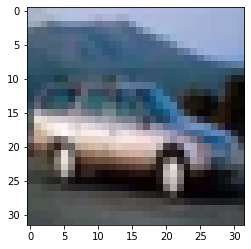

In [15]:
plt.imshow(trainX[4])

In [16]:
trainy[4]

array([1], dtype=uint8)

```python

Diccionario de las imágenes
0: aviones
1: coches
2: aves
3: gatos
4: venados
5: perros
6: ranas
7: caballos
8: barcos
9: camiones
    
```

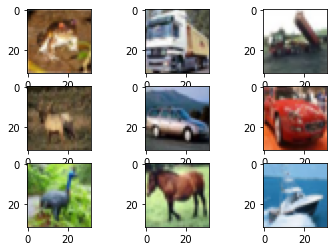

In [19]:
for i in range(9):
    plt.subplot(330+1+i) #3x3. "i" toma posición 0, 1, 2 ,...8
    plt.imshow(trainX[i])
plt.show()


Vamos a Definir un modelo base para establecer un mínimo de desempeño, para los cual otros modelos
se podrían comparar. 
Puede ser un VGG (Visual Geometry Group) modelos. Estos modelos alcanzaron un buen desepeño 
en competencias de reconociminto de imágenes (ILSVRC 2014) y su estructura es relativamente sencilla. 
Pueden incontrar más info:  https://arxiv.org/abs/1409.1556

El modelo involucra anidar capas Convolucionales de filtros de 3x3 después de un MaxPooling. El 
acumular capas convolucionales y después aplciar un MaxPooling se considera un bloque. Estos bloques pueden 
ser repetidos donde el número de filtros de dentro de las capas convolucionales aumentan de 32 a 64 a 128 por
bloque. Se usa Padding. Se usa Relu y se inicializan los pesos de forma uniforme. 

Finalmente una capa totalmente conectada con 128 neuronas ocultas y 10 outputs (10 categorias) .

Enfoque conservador es usar un SGD, con un lr=.001 y momentum=0.9

La idea es que el primer bloque arroja resultados de orden de 70% Accuracy. Si se utilizan 2 bloques sube a 72%, 
si se utilizan 3 bloques sube a 74%. Si se agrega Dropout entre capas y Regularizadores sube a más de 85%. 


In [81]:
from tensorflow.keras.optimizers import Adam
def define_model():
    model=Sequential()
    #Esto será el primer bloque
    #El primer argumento es el número de filtros. 
    #tamaño del filtro recomendado es de 3x3
    
    #PIMER BLOQUE BLOQUE
    model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",
                padding='same',input_shape=(32,32,3)))
    #model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",
        #            padding='same',input_shape=(32,32,3)))
    #model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",
                 #   padding='same'))
    model.add(MaxPooling2D(2,2))


    #SEGUNDO BLOQUE BLOQUE
    model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",
                padding='same'))
   # model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",
                 #   padding='same'))
    #model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",
                  #  padding='same'))
    model.add(MaxPooling2D(2,2))
    
    
    #TERCER BLOQUE BLOQUE
    model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",
                    padding='same'))
    #model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer="he_uniform",
         #           padding='same'))
    #model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer="he_uniform",
                #    padding='same'))
    model.add(MaxPooling2D(2,2))
    
    
    #AQUI PUEDE IR UN CUARTO BLOQUE
    #....
    
    
    model.add(Flatten())
    model.add(Dense(20,activation="relu",kernel_initializer="he_uniform"))

    #model.add(Dense(512,activation="relu",kernel_initializer="he_uniform"))
    #aquí pueden ir más capas ocultas

    model.add(Dense(10,activation="softmax"))
    #Compilamosb
    opt=Adam()
    model.compile(optimizer=opt,loss="categorical_crossentropy",
                 metrics=["accuracy"])
    return model



In [76]:
modelo=define_model()

In [77]:
modelo.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2048)            

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
#Early Stopping
#callback= EarlyStopping(monitor="val_loss",patienc=10)
callback=EarlyStopping(monitor="accuracy",patience=2)

### Información de Libro 2 y 5. 

In [82]:
def cargar_datos():
    #Dscargar datos
    (X_train, y_train), (X_test, y_test)=cifar10.load_data()

    y_train=tf.keras.utils.to_categorical(y_train)
    y_test=tf.keras.utils.to_categorical(y_test)

    return X_train, y_train, X_test, y_test

def escalar_imagen(train,test):
    #convrtir a flotatenes y normalizar en el rango 0-1
    train_norm=train.astype("float32")/255.0  
    test_norm=test.astype("float32")/255.0 
    
    #regrese las imagenes normalizadas 
    return train_norm, test_norm


#Definir una validación cruzada
def evaluar_modelo(dataX,dataY,n_folds=2):
    #Generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #Se generan los índices de la validación cruzada
    kfold=KFold(n_folds,shuffle=True,random_state=1)
    #para cada fold (les dice qué indice del train y del test hay que tomar)
    for train_ix, test_ix in kfold.split(dataX):
        #Definimos el modelo
        model=define_model()

        #Seleccionamos las filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        
        #fit al modelo. le pasamos entrenamiento y validación (verbose=0 no imprime nada)
        
        #aquí nos da la información de los epochs
        history=model.fit(trainX,trainY,epochs=3,validation_data=(testX,testY),verbose=0)#,
                          #callbacks=[callback])
        
        #evaluamos el último epochs
        _, acc= model.evaluate(testX,testY,verbose=0)
        
        print(">%.3f"%(acc*100.0))
        scores.append(acc)
        histories.append(history)
        
    return scores,histories
        
def graficar_resumen(histories):
    for i in range(len(histories)):
        plt.subplot(211)
        plt.title("Classification Accuracy")
        plt.plot(histories[i].history["accuracy"],color="blue",label="train")
        plt.plot(histories[i].history["val_accuracy"],color="orange",label="test")
        plt.show()       


In [83]:
def correr_todo():
    #cargar datos
    trainX, trainY, testX, testY=cargar_datos()
    #escalamos datos
    trainX,testX=escalar_imagen(trainX,testX)
    #creamos modelo
    modelo=define_model()
    #evaluamos modelo
    scores,histories=evaluar_modelo(trainX,trainY)

    #graficar por epoch
    graficar_resumen(histories)
    
    
    #Vamos a guardar l modelo final para probarlo con una imagen de su 
    #computadora
    
    modelo.save("modelo_grupo9.h5")
    

In [84]:
import tensorflow as tf


>47.252
>9.704


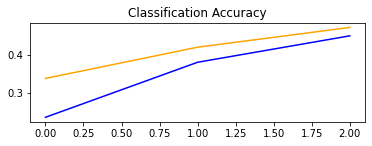

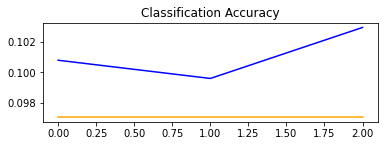

In [85]:
correr_todo()

# predecir cualquier imágen de su compu

In [86]:
#librerías que veremos para subir imágenes y hacer predicciones
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

In [87]:
def cargar_imagen(imagen):
    img=load_img(imagen,target_size=(32,32))
    img=img_to_array(img)
    img=img.reshape(1,32,32,3)
    img=img.astype('float32')
    return img



In [88]:
model=load_model("modelo_grupo9.h5")

In [89]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)            

In [90]:
def predecir_imagen():
    img=cargar_imagen("caballo_gp9.png")
    model=load_model("modelo_grupo9.h5")  
    y_prob=model.predict(img)
    y_classes=y_prob.argmax(axis=-1)
    print(y_classes)
    print(y_prob)



In [91]:
predecir_imagen()

[4]
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 6.524905e-21 0.000000e+00 0.000000e+00 0.000000e+00]]


In [ ]:
#El moodelo para la imagen de un Caballo hizo una predicción d